In [15]:
# Practice getting NFL data and making data tables

In [16]:
from sportsipy.nfl.schedule import Schedule
from sportsipy.nfl.teams import Teams
import pandas as pd
from sportsipy.nfl.boxscore import Boxscores, Boxscore
from datetime import date
import requests
from bs4 import BeautifulSoup
import re
import keras
import seaborn as sns

In [17]:
teams = Teams()
df = pd.DataFrame(columns = ['Name', 'Abbreviation', 'Penalties', 'Wins', 'Pass Attempts', 'Rush Attempts', 'First Downs',
                            'Turnovers', 'Strength of Schedule', 'Rushing Yards', 'Passing Yards', 'Fumbles', 'Interceptions'])

df['Name'] = [x.name for x in teams]
df['Abbreviation'] = [x.abbreviation for x in teams]
df['Wins'] = [x.wins for x in teams]
df['Penalties'] = [x.penalties for x in teams]
df['Pass Attempts'] = [x.pass_attempts for x in teams]
df['Rush Attempts'] = [x.rush_attempts for x in teams]
df['First Downs'] = [x.first_downs for x in teams]
df['Turnovers'] = [x.turnovers for x in teams]
df['Strength of Schedule'] = [x.strength_of_schedule for x in teams]
df['Rushing Yards'] = [x.rush_yards for x in teams]
df['Passing Yards'] = [x.pass_yards for x in teams]
df['Fumbles'] = [x.fumbles for x in teams]
df['Interceptions'] = [x.interceptions for x in teams]


In [18]:
correlation_data = df[['Wins', 'Pass Attempts', 'Rush Attempts', 'Penalties', 'Turnovers', 'First Downs', 'Strength of Schedule',
                  'Rushing Yards', 'Passing Yards', 'Fumbles', 'Interceptions']]
correlation_data.corr(method ='pearson')

,Wins,Pass Attempts,Rush Attempts,Penalties,Turnovers,First Downs,Strength of Schedule,Rushing Yards,Passing Yards,Fumbles,Interceptions
Wins,1.000000,0.130542,0.387813,-0.206872,-0.386065,0.771425,-0.253977,0.316449,0.623087,-0.192806,-0.336476
Pass Attempts,0.130542,1.000000,-0.599684,0.380748,0.191683,0.409033,0.215623,-0.510704,0.719971,0.077732,0.177294
Rush Attempts,0.387813,-0.599684,1.000000,-0.151220,-0.132475,0.322571,-0.306096,0.865226,-0.286868,-0.017250,-0.143266
Penalties,-0.206872,0.380748,-0.151220,1.000000,0.208519,0.064673,0.420260,-0.093405,0.157686,0.054630,0.209881
Turnovers,-0.386065,0.191683,-0.132475,0.208519,1.000000,-0.140010,0.161194,-0.203651,-0.216007,0.501089,0.870602
First Downs,0.771425,0.409033,0.322571,0.064673,-0.140010,1.000000,-0.124913,0.441557,0.682367,-0.017504,-0.151828
Strength of Schedule,-0.253977,0.215623,-0.306096,0.420260,0.161194,-0.124913,1.000000,-0.266268,-0.011829,0.060149,0.152061
Rushing Yards,0.316449,-0.510704,0.865226,-0.093405,-0.203651,0.441557,-0.266268,1.000000,-0.228596,0.031351,-0.253137
Passing Yards,0.623087,0.719971,-0.286868,0.157686,-0.216007,0.682367,-0.011829,-0.228596,1.000000,-0.166587,-0.154884
Fumbles,-0.192806,0.077732,-0.017250,0.054630,0.501089,-0.017504,0.060149,0.031351,-0.166587,1.000000,0.010485


<AxesSubplot:>

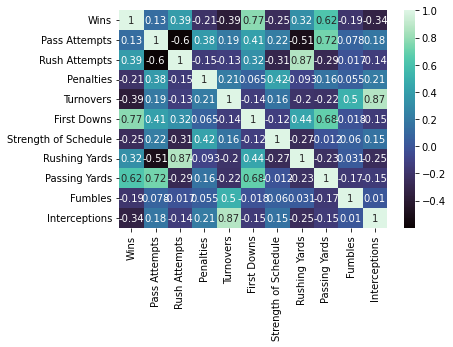

In [19]:
sns.heatmap(correlation_data.corr(), annot=True, cmap="mako")

In [20]:
# creating the date object of today's date
todays_date = date.today()

# web scrape CBS for current week
url = 'https://www.cbssports.com/nfl/schedule/'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")
results = soup.find(id="PageTitle-header").text
try:
    current_week = int(re.search(r'\d+', results).group())
except:
    print('Not in season')

games_today = Boxscores(current_week, todays_date.year)
# Prints a dictionary of all matchups for week 1 of 2017
# games_today = pd.DataFrame.from_dict(games_today.games)

In [21]:
current_schedule = pd.DataFrame(columns = ['Away Team', 'Home Team', 'Away Score', 'Home Score', 'Winner'])

In [22]:
for key in games_today.games.keys():
        current_schedule['Away Team'] =  [item['away_name'] for item in games_today.games[key]]
        current_schedule['Home Team'] =  [item['home_name'] for item in games_today.games[key]]
        current_schedule['Away Score'] =  [item['away_score'] for item in games_today.games[key]]
        current_schedule['Home Score'] =  [item['home_score'] for item in games_today.games[key]]
        current_schedule['Winner'] =  [item['winning_name'] for item in games_today.games[key]]

In [23]:
history_of_seasons = pd.DataFrame(columns = ['Away Team', 'Home Team', 'Away Score', 'Home Score', 'Winner'])

In [24]:
year = todays_date.year
week = current_week-1
away = []
home = []
away_score = []
home_score = []
winner = []

while year >= todays_date.year-5:
    if year != todays_date.year: week = 16
    while week >= 1:
        previous_games = Boxscores(week, year)
        for key in previous_games.games.keys():
            away.extend(item['away_name'] for item in previous_games.games[key])
            home.extend(item['home_name'] for item in previous_games.games[key])
            away_score.extend(item['away_score'] for item in previous_games.games[key])
            home_score.extend(item['home_score'] for item in previous_games.games[key])
            winner.extend(item['winning_name'] for item in previous_games.games[key])
        week = week-1 
    year = year-1

In [25]:
history_of_seasons['Away Team'] =  away
history_of_seasons['Home Team'] =  home
history_of_seasons['Away Score'] = away_score
history_of_seasons['Home Score'] =  home_score
history_of_seasons['Winner'] =  winner

In [26]:
history_of_seasons=history_of_seasons.replace({'Oakland Raiders': 'Las Vegas Raiders', 'St. Louis Rams':'Los Angeles Rams',
                           'Washington Redskins':'Washington Football Team'}, regex=True)

In [27]:
history_of_seasons

,Away Team,Home Team,Away Score,Home Score,Winner
0,Pittsburgh Steelers,Minnesota Vikings,28,36,Minnesota Vikings
1,San Francisco 49ers,Cincinnati Bengals,26,23,San Francisco 49ers
2,Atlanta Falcons,Carolina Panthers,29,21,Atlanta Falcons
3,Dallas Cowboys,Washington Football Team,27,20,Dallas Cowboys
4,Jacksonville Jaguars,Tennessee Titans,0,20,Tennessee Titans
...,...,...,...,...,...
1403,Detroit Lions,Indianapolis Colts,39,35,Detroit Lions
1404,New York Giants,Dallas Cowboys,20,19,New York Giants
1405,New England Patriots,Arizona Cardinals,23,21,New England Patriots
1406,Pittsburgh Steelers,Washington Football Team,38,16,Pittsburgh Steelers


In [28]:
history = [away, home, away_score, home_score, winner]

['Las Vegas Raiders' if x=='Oakland Raiders' else x for x in history[home] or history[away]]
['St. Louis Rams' if x=='Los Angeles Rams' else x for x in history[home] or history[away]]
['Washington Redskins' if x=='Washington Football Team' else x for x in history[home] or history[away]]

TypeError: list indices must be integers or slices, not list

In [41]:
# function to get current week in the NFL
def get_current_week():
    # creating the date object of today's date
    todays_date = date.today()
    year = todays_date.year

    # web scrape CBS for current week
    url = 'https://www.cbssports.com/nfl/schedule/'
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    results = soup.find(id="PageTitle-header").text
    try:
        current_week = int(re.search(r'\d+', results).group())
    except:
        print('Not in season')

    return current_week, year    

In [44]:
# function that returns this week schedule in a list of lists
def get_curr_sched():

    current_week, year = get_current_week()
    away = []
    home = []
    away_score = []
    home_score = []
    winner = []

    games_today = Boxscores(current_week, year)
    # Prints a dictionary of all matchups for current week of current year

    # Construct this weeks schedule array
    for key in games_today.games.keys():
        away.extend(item['away_name'] for item in games_today.games[key])
        home.extend(item['home_name'] for item in games_today.games[key])
        away_score.extend(item['away_score'] for item in games_today.games[key])
        home_score.extend(item['home_score'] for item in games_today.games[key])
        winner.extend(item['winning_name'] for item in games_today.games[key])
    

    curr_sched = [away, home, away_score, home_score, winner]

    return curr_sched

# function that returns history of games in a list of lists
def get_history_of_seasons():
    # Construct a dataframe containing the last 5 years of games
    history_of_seasons = pd.DataFrame(columns = ['Away Team', 'Home Team', 'Away Score', 'Home Score', 'Winner'])

    week, year = get_current_week()
    week = week-1
    away = []
    home = []
    away_score = []
    home_score = []
    winner = []
    curr_year = year

    while curr_year >= year-5:
        if curr_year != year: week = 16
        while week >= 1:
            previous_games = Boxscores(week, curr_year)
            for key in previous_games.games.keys():
                away.extend(item['away_name'] for item in previous_games.games[key])
                home.extend(item['home_name'] for item in previous_games.games[key])
                away_score.extend(item['away_score'] for item in previous_games.games[key])
                home_score.extend(item['home_score'] for item in previous_games.games[key])
                winner.extend(item['winning_name'] for item in previous_games.games[key])
            week = week-1 
        curr_year = curr_year-1

    history = [away, home, away_score, home_score, winner]

    return history


In [45]:
curr_sched = get_curr_sched()

In [46]:
print(curr_sched)

[['Kansas City Chiefs', 'Las Vegas Raiders', 'New England Patriots', 'Green Bay Packers', 'Tennessee Titans', 'Washington Football Team', 'Dallas Cowboys', 'New York Jets', 'Houston Texans', 'Arizona Cardinals', 'Carolina Panthers', 'Atlanta Falcons', 'Cincinnati Bengals', 'Seattle Seahawks', 'New Orleans Saints', 'Minnesota Vikings'], ['Los Angeles Chargers', 'Cleveland Browns', 'Indianapolis Colts', 'Baltimore Ravens', 'Pittsburgh Steelers', 'Philadelphia Eagles', 'New York Giants', 'Miami Dolphins', 'Jacksonville Jaguars', 'Detroit Lions', 'Buffalo Bills', 'San Francisco 49ers', 'Denver Broncos', 'Los Angeles Rams', 'Tampa Bay Buccaneers', 'Chicago Bears'], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]]
